In [232]:
import argparse
import numpy as np
from mlp_numpy import MLP
from modules import CrossEntropy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500  # adjust if you use batch or not
EVAL_FREQ_DEFAULT = 10
SGD_DEFAULT = True
BATCH_SIZE_DEFAULT = 1

def accuracy(predictions, targets):
    """
    Computes the prediction accuracy, i.e., the percentage of correct predictions.

    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        targets: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding

    Returns:
        accuracy: scalar float, the accuracy of predictions as a percentage.
    """
    # TODO: Implement the accuracy calculation
    # Hint: Use np.argmax to find predicted classes, and compare with the true classes in targets
    p = np.argmax(predictions, axis=1)
    true_class = np.argmax(targets, axis=1)
    return np.mean(p == true_class)


def shuffle_and_batch(X, y, batch_size):
    shuffle_index = np.random.permutation(len(X))
    X_shuffled = X[shuffle_index]
    y_shuffled = y[shuffle_index]

    num_batches = len(X) // batch_size
    batches = []

    for i in range(num_batches):
        X_batch = X_shuffled[i * batch_size:(i + 1) * batch_size]
        y_batch = y_shuffled[i * batch_size:(i + 1) * batch_size]
        batches.append((X_batch, y_batch))

    if len(X) % batch_size != 0:
        X_batch = X_shuffled[num_batches * batch_size:]
        y_batch = y_shuffled[num_batches * batch_size:]
        batches.append((X_batch, y_batch))

    return batches

In [233]:
def train(dnn_hidden_units, learning_rate, max_steps, eval_freq, sgd, batch_size):
    """
    Performs training and evaluation of MLP model.

    Args:
        dnn_hidden_units: Comma separated list of number of units in each hidden layer
        learning_rate: Learning rate for optimization
        max_steps: Number of epochs to run trainer
        eval_freq: Frequency of evaluation on the test set
        NOTE: Add necessary arguments such as the data, your model...
    """
    # TODO: Load your data here
    dnn_hidden_units = [int(x) for x in dnn_hidden_units.split(',')]
    X, y = make_moons(n_samples=1000, shuffle=True)
    n_values = np.max(y) + 1
    y = np.eye(n_values)[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    steps, acc_train, acc_test, loss_train, loss_test = [], [], [], [], []

    # TODO: Initialize your MLP model and loss function (CrossEntropy) here
    model = MLP(n_inputs=2, n_hidden=dnn_hidden_units, n_classes=2)
    loss = CrossEntropy()

    for step in range(max_steps):
        # TODO: Implement the training loop
        if sgd == False:
            y = model.forward(X_train)
            l = loss.forward(y, y_train)
            dout = loss.backward(y, y_train)
            model.backward(dout)
            model.head.params['weight'] = model.head.params['weight'] - learning_rate * model.head.grads['weight']
            model.head.params['bias'] = model.head.params['bias'] - learning_rate * model.head.grads['bias']
            for linear in model.linears:
                linear.params['weight'] = linear.params['weight'] - learning_rate * linear.grads['weight']
                linear.params['bias'] = linear.params['bias'] - learning_rate * linear.grads['bias']
        else:
            batches = shuffle_and_batch(X_train, y_train, batch_size=batch_size)
            for X, y in batches:
                X = X.reshape((1, -1))
                y_hat = model.forward(X)
                l = loss.forward(y_hat, y)
                dout = loss.backward(y_hat, y)
                model.backward(dout)
                model.head.params['weight'] = model.head.params['weight'] - learning_rate * model.head.grads['weight']
                model.head.params['bias'] = model.head.params['bias'] - learning_rate * model.head.grads['bias']
                for linear in model.linears:
                    linear.params['weight'] = linear.params['weight'] - learning_rate * linear.grads['weight']
                    linear.params['bias'] = linear.params['bias'] - learning_rate * linear.grads['bias']

        if step % eval_freq == 0 or step == max_steps - 1:
            # TODO: Evaluate the model on the test set
            # 1. Forward pass on the test set
            # 2. Compute loss and accuracy
            y = model.forward(X_train)
            l = loss.forward(y, y_train)
            steps.append(step)
            acc_train.append(accuracy(y, y_train))
            loss_train.append(l)
            y = model.forward(X_test)
            acc_test.append(accuracy(y, y_test))
            loss_test.append(l)
            print(f"Step: {step}, Loss: {l}, Accuracy: {accuracy(y, y_test)}")

    print("Training complete!")
    return steps, acc_train, acc_test, loss_train, loss_test

In [234]:
steps, acc_train, acc_test, loss_train, loss_test = \
    train(DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, sgd=False, batch_size=500)



Step: 0, Loss: 0.6951195701306812, Accuracy: 0.455
Step: 10, Loss: 4.7539671389360425, Accuracy: 0.455
Step: 20, Loss: 0.5053015242001011, Accuracy: 0.765
Step: 30, Loss: 0.3943536606069277, Accuracy: 0.81
Step: 40, Loss: 0.3371277501255446, Accuracy: 0.85
Step: 50, Loss: 0.3600858276244249, Accuracy: 0.86
Step: 60, Loss: 0.47014862099969135, Accuracy: 0.865
Step: 70, Loss: 0.4209282568002594, Accuracy: 0.86
Step: 80, Loss: 0.44392930377406153, Accuracy: 0.865
Step: 90, Loss: 0.4354250933856764, Accuracy: 0.87
Step: 100, Loss: 0.42922106022794865, Accuracy: 0.87
Step: 110, Loss: 0.42329112361392335, Accuracy: 0.87
Step: 120, Loss: 0.4165016004390671, Accuracy: 0.87
Step: 130, Loss: 0.43317071797834594, Accuracy: 0.87
Step: 140, Loss: 0.4187951142139708, Accuracy: 0.87
Step: 150, Loss: 0.41562758318747883, Accuracy: 0.87
Step: 160, Loss: 0.4131592704536127, Accuracy: 0.87
Step: 170, Loss: 0.4189640834238644, Accuracy: 0.87
Step: 180, Loss: 0.4202005816934047, Accuracy: 0.87
Step: 190, L

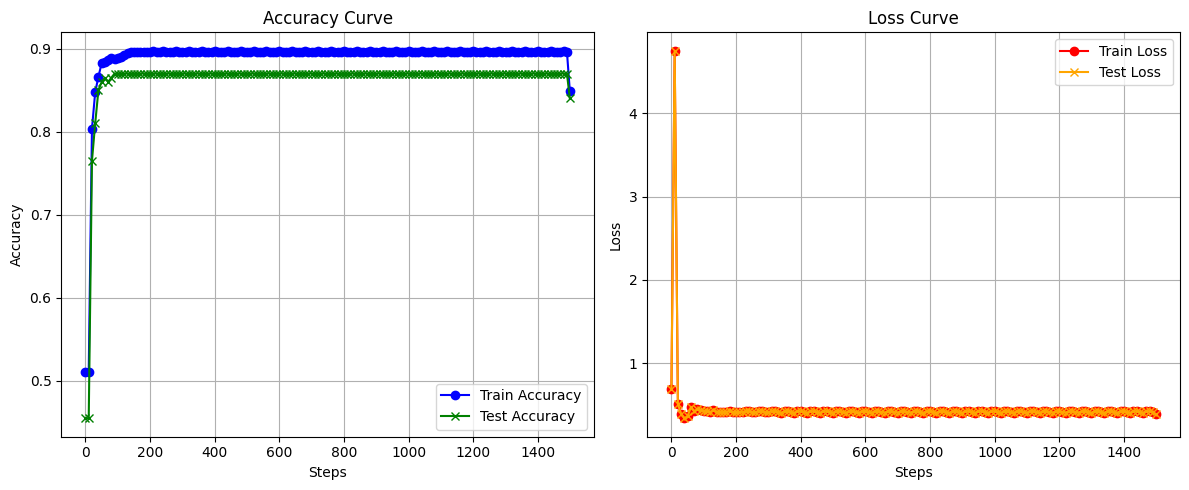

In [235]:
import matplotlib.pyplot as plt

def plot_training_curves(steps, acc_train, acc_test, loss_train, loss_test):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(steps, acc_train, label='Train Accuracy', color='b', marker='o')
    ax[0].plot(steps, acc_test, label='Test Accuracy', color='g', marker='x')
    ax[0].set_title('Accuracy Curve')
    ax[0].set_xlabel('Steps')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(steps, loss_train, label='Train Loss', color='r', marker='o')
    ax[1].plot(steps, loss_test, label='Test Loss', color='orange', marker='x')
    ax[1].set_title('Loss Curve')
    ax[1].set_xlabel('Steps')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    
    plt.show()

plot_training_curves(steps, acc_train, acc_test, loss_train, loss_test)